*This notebook is attempt to build a machine leaning model capable of predicting whether or not someone have breast cancer based on their medical attribute.*

# Problem Definition
> Given clinincal parameter about a patient , can we predict whether or not they have Breast Cancer?

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score

In [2]:
df=datasets.load_breast_cancer()

In [3]:
df=pd.DataFrame(df.data,columns=df.feature_names)

In [4]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [5]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df["label"]=datasets.load_breast_cancer().target

In [8]:
df.shape

(569, 31)

In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
df["label"].value_counts()

1    357
0    212
Name: label, dtype: int64

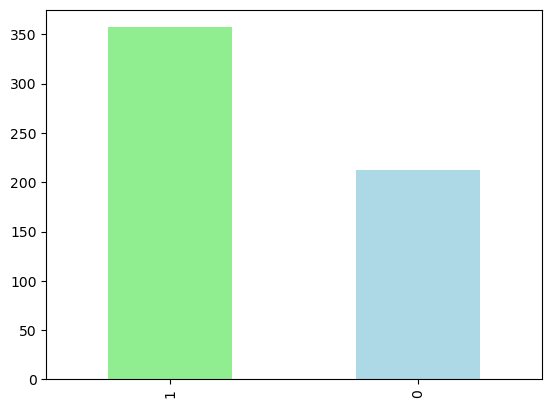

In [11]:
df["label"].value_counts().plot(kind="bar",color=["lightgreen","lightblue"]);

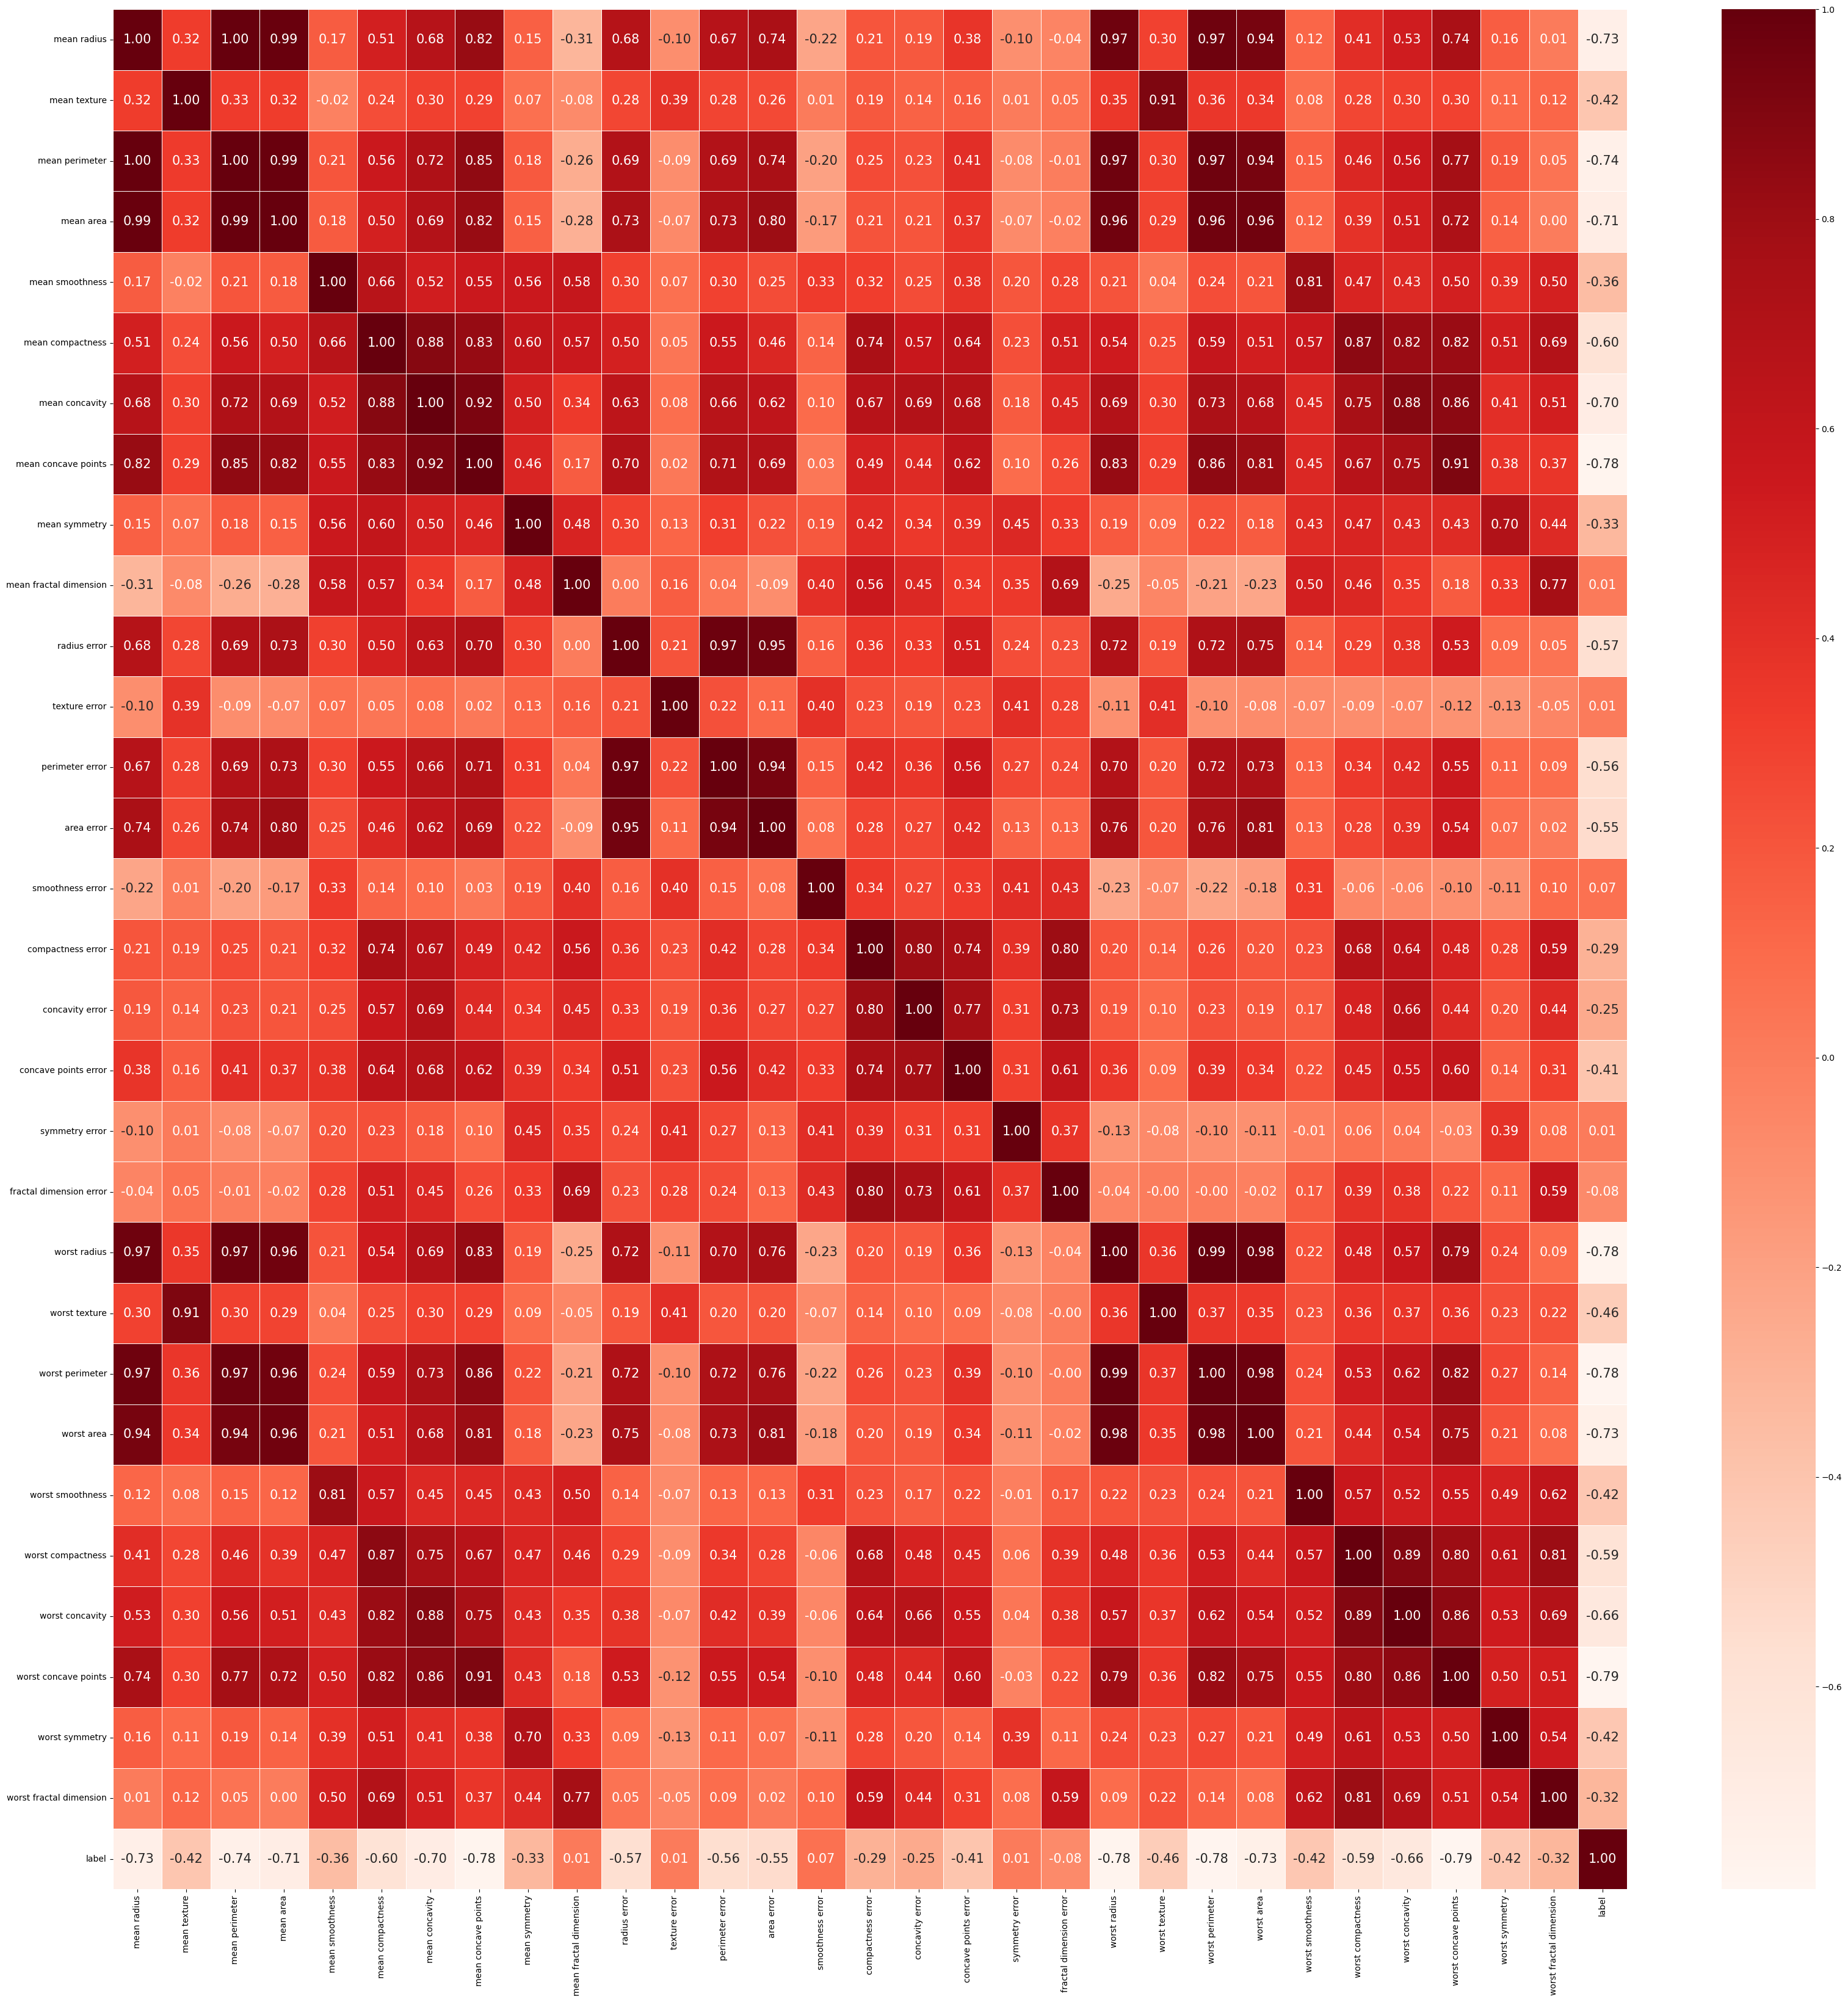

In [12]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(40,40))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap='Reds',annot_kws={"fontsize":15})


In [13]:
y=df.label
x=df.drop("label",axis=1)

# Finding highly co-related feature 

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
model = Lasso()
sfm = SelectFromModel(estimator=model)
sfm.fit(x, y)
selected_features = x.columns[sfm.get_support()]


In [15]:
selected_features

Index(['worst perimeter', 'worst area'], dtype='object')

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30,test_size=0.2)

In [17]:

model={
    "Logistic Regression(L1-regularization)":LogisticRegression(max_iter=10000,penalty='l1', solver='liblinear'),
    "Logistic Regression(L2-regularization)":LogisticRegression(max_iter=10000,penalty='l2'),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()}

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    
    model_scores={}
    for name,model in models.items():
        
        model.fit(x_train,y_train)
        
        model_scores[name]=[model.score(x_test,y_test),model.score(x_train,y_train)]
    return model_scores


In [18]:
model_scores=fit_and_score(model,x_train,x_test,y_train,y_test)
print("Model_name :[Accuracy on test data, Accuracy on training data]")
for key,value in model_scores.items():
    print(key,value)

Model_name :[Accuracy on test data, Accuracy on training data]
Logistic Regression(L1-regularization) [0.9122807017543859, 0.9736263736263736]
Logistic Regression(L2-regularization) [0.8947368421052632, 0.9714285714285714]
KNN [0.9122807017543859, 0.9472527472527472]
Random Forest [0.956140350877193, 1.0]


#### tuning hyper-parameter of LogisticRegression

In [19]:
log_res_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_lead":np.arange(1,20,2)
        }
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_res_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [20]:
rs_log_reg.best_params_,rs_log_reg.score(x_test,y_test)

({'solver': 'liblinear', 'C': 10000.0}, 0.9385964912280702)

In [21]:
from sklearn.model_selection import GridSearchCV
log_reg_grid={"C":[0.1, 1.0, 10.0],
             "solver":["liblinear"]}
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0], 'solver': ['liblinear']},
             verbose=True)

In [22]:
gs_log_reg.best_params_

{'C': 10.0, 'solver': 'liblinear'}

In [23]:
gs_log_reg.score(x_test,y_test)

0.9122807017543859

In [24]:
model=LogisticRegression(solver="liblinear",C=0.9385964912280702,max_iter=10000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9035087719298246

In [25]:
y_preds=model.predict(x_test)

Text(0, 0.5, 'True Positive Rate')

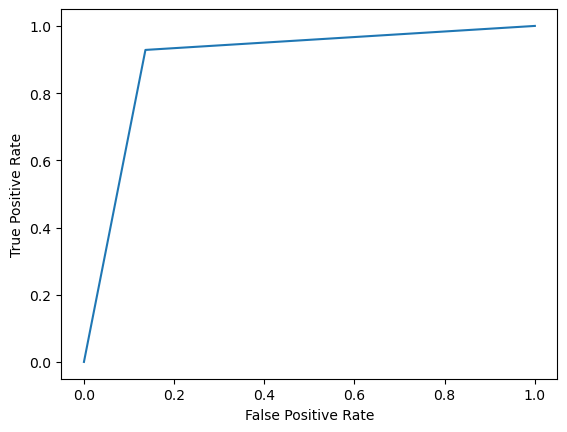

In [26]:
fpr, tpr, thresholds = roc_curve(np.array(y_test), y_preds)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

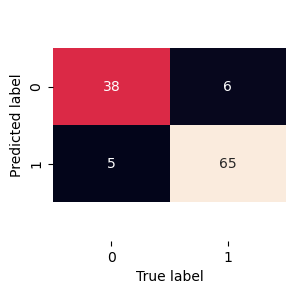

In [27]:
def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    bottom,top=ax.get_ylim()
    ax.set_ylim(bottom+0.5,top-0.5)
plot_conf_mat(y_test,y_preds)

In [28]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        44
           1       0.92      0.93      0.92        70

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



In [29]:
from sklearn.model_selection import cross_val_score
clf=LogisticRegression(C=0.1082636733874054,solver="liblinear")
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision=np.mean(cv_precision)
cv_precision

0.9459910503388764

In [30]:
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall=np.mean(cv_recall)
cv_recall

0.969131455399061

In [31]:
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1=np.mean(cv_f1)
cv_f1

0.9571289206905644

In [32]:
model.coef_

array([[ 1.89154121,  0.04224145,  0.15276077, -0.00555872, -0.08990853,
        -0.34665538, -0.50585374, -0.25041767, -0.11020246, -0.02378065,
         0.05803543,  0.77460074,  0.69508251, -0.16476515, -0.00954496,
        -0.04704151, -0.06193409, -0.03198915, -0.02575706, -0.00292083,
         1.49298649, -0.27239538, -0.32835184, -0.0205714 , -0.1714277 ,
        -1.04397197, -1.30001396, -0.46583162, -0.44617705, -0.10681241]])

In [33]:
feature_dict=dict(zip(df.columns,list(model.coef_[0])))

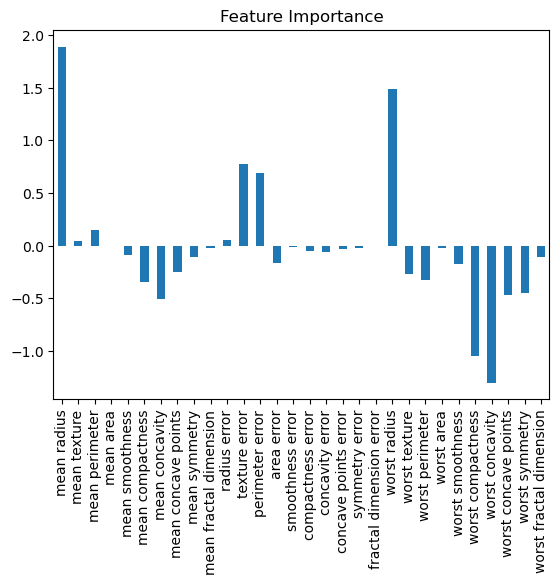

In [34]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);